In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [30]:
# Load air quality data, drop the index column and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:, 1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [31]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3

X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [32]:
#Run the model for many alphas.
DAlpha = []
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    lassBig = linear_model.Lasso(alpha=lambd/4)
    ridgeregrBig.fit(X_train2, Y_train)
    lassBig.fit(X_train2, Y_train)
    DeltaLam = [lambd, ridgeregrBig.score(X_test2, Y_test), lassBig.score(X_train2, Y_train)]
    DAlpha.append(DeltaLam)
    
DAlpha = pd.DataFrame(DAlpha)
DAlpha.columns = ['lambd', 'ridge', 'lasso']

In [33]:
DAlpha.head()

,lambd,ridge,lasso
0,1,0.563068,0.507344
1,3,0.563122,0.026834
2,5,0.563147,0.026834
3,7,0.563163,0.026834
4,9,0.563175,0.026834


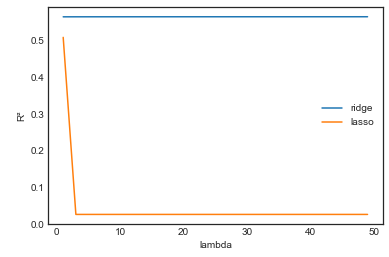

In [34]:
labels = []
# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(DAlpha.columns[:9,])
varstoplot.remove('lambd')
# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(DAlpha['lambd'], DAlpha[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('\nR²')
plt.legend(labels)
plt.show()